# Analysis

## 1. Loading Data and Modules

In [7]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import tensorflow as tf

path_parent = os.path.dirname(os.getcwd())

if os.getcwd()[-8:] != 'FYP-Code':
    os.chdir(path_parent)

print(os.getcwd())

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/samaypanwar/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Uni/FYP/FYP-Code


In [8]:
from helper.synthesis import generate_data

In [9]:
# generate_data()

In [10]:
from analysis.pointwise.utils import load_data, init_model
from analysis.pointwise.train import train_model

params_range_train, params_range_test, price_train, price_test = load_data()

## 2. Training Model

In [11]:
model = init_model()

Model: "dense_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             multiple                  224       
                                                                 
 dense_5 (Dense)             multiple                  1056      
                                                                 
 batch_normalization_1 (Batc  multiple                 128       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             multiple                  1056      
                                                                 
 dense_7 (Dense)             multiple                  33        
                                                                 
Total params: 2,497
Trainable params: 2,433
Non-trainable params: 64
__________________________________________________

2023-03-10 15:28:36,550 | INFO: | train.py | train_model | 120: Beginning training for model dense with vasicek


Training...: 100%|██████████| 2/2 [00:02<00:00,  1.13s/it]

2023-03-10 15:28:38,813 | INFO: | train.py | train_model | 169: Saved weights to file: weights/pointwise/weights.h5


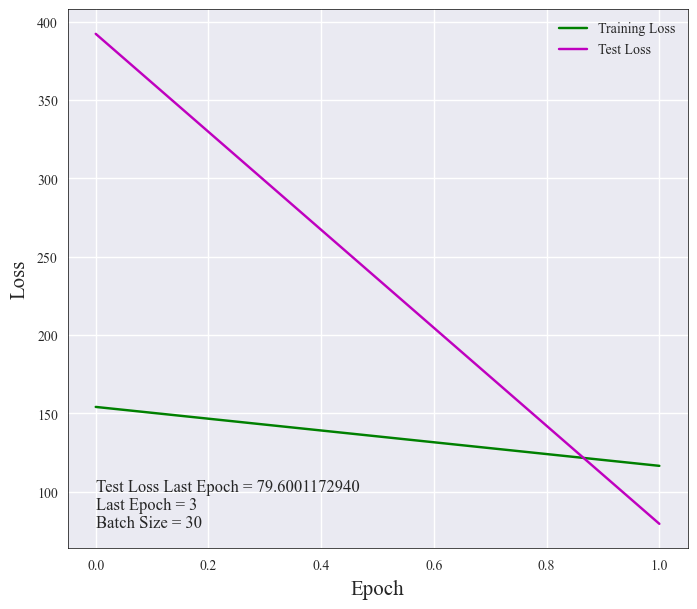

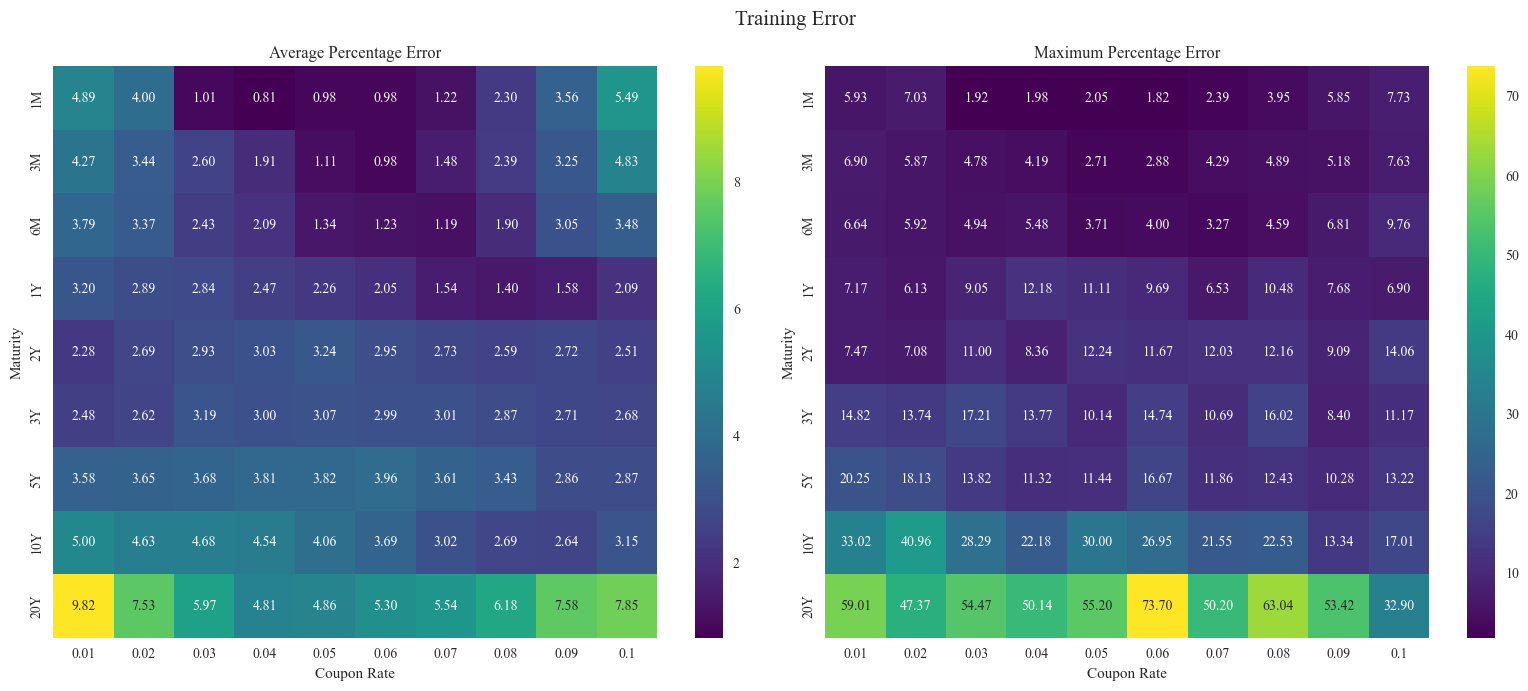

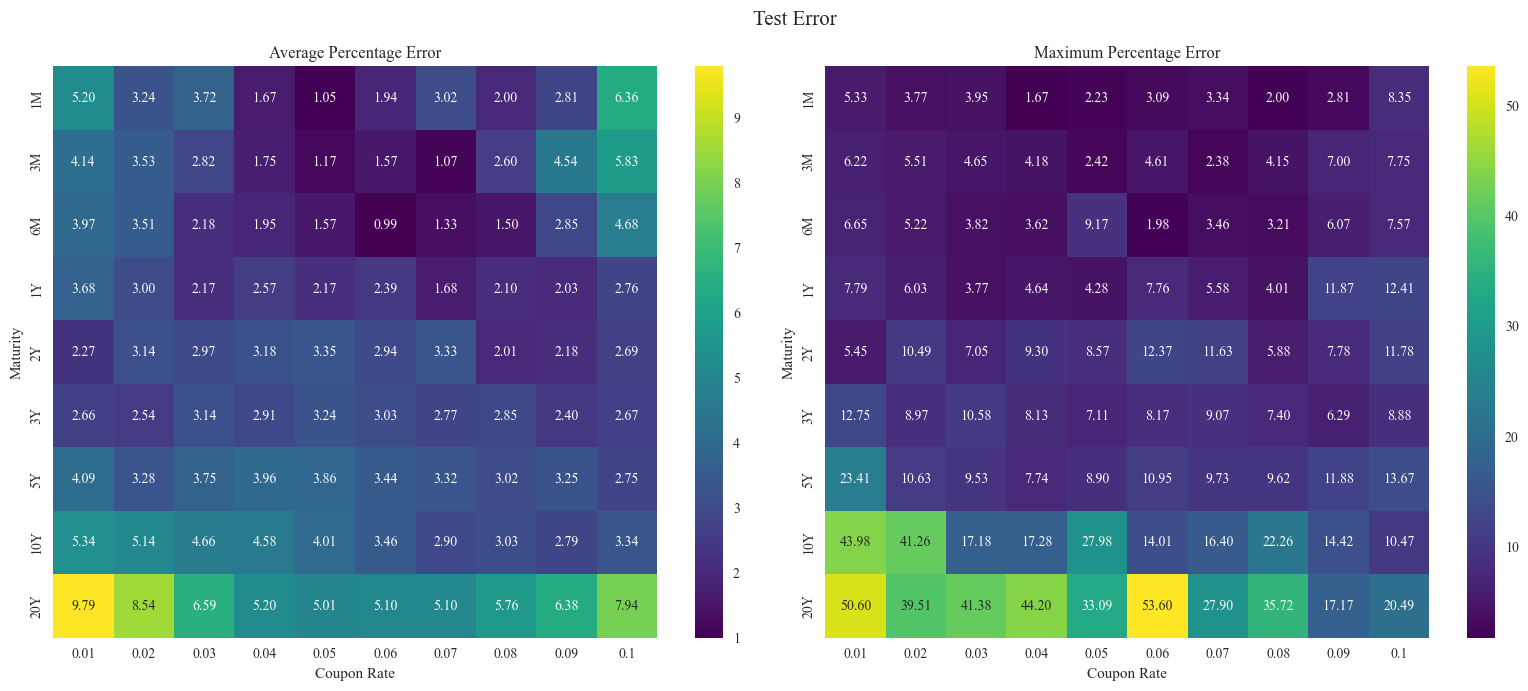

In [13]:
train_model(model = model, epochs = 2, plot = True);

## Synthetic Calibration

Model: "dense_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            multiple                  224       
                                                                 
 dense_13 (Dense)            multiple                  1056      
                                                                 
 batch_normalization_3 (Batc  multiple                 128       
 hNormalization)                                                 
                                                                 
 dense_14 (Dense)            multiple                  1056      
                                                                 
 dense_15 (Dense)            multiple                  33        
                                                                 
Total params: 2,497
Trainable params: 2,433
Non-trainable params: 64
__________________________________________________

Calibrating...: 100%|██████████| 100/100 [00:03<00:00, 33.13it/s]

2023-03-10 15:29:43,651 | INFO: | calibrate_synthetic.py | calibrate_synthetic | 156: Calibration complete! change in parameters: 0.2647673896180458
2023-03-10 15:29:43,653 | INFO: | calibrate_synthetic.py | calibrate_synthetic | 160: Saved parameters to file: data/pointwise/calibrated_parameters.dat


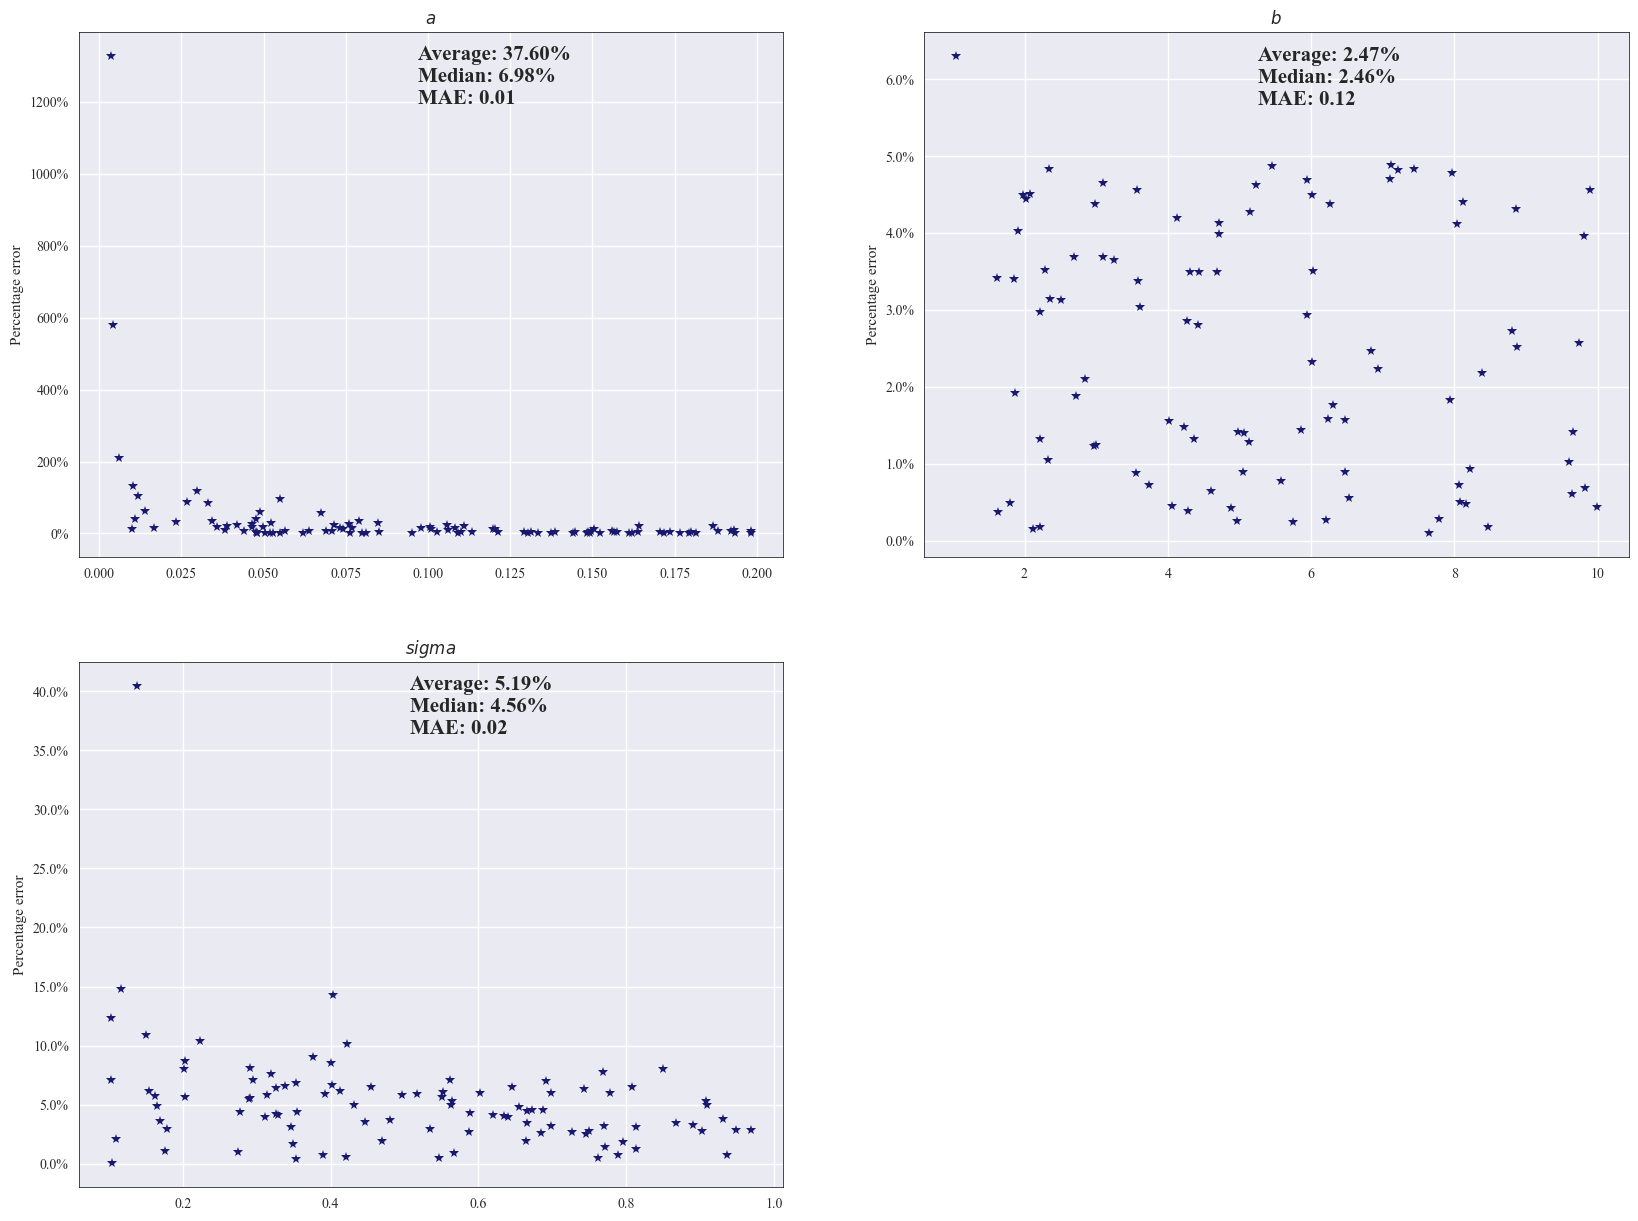

In [15]:
from analysis.pointwise.calibrate_synthetic import calibrate_synthetic
from analysis.pointwise.utils import load_weights, init_model

model = init_model()

load_weights(model)

calibrate_synthetic(
        model, calibration_size = 100, epochs = 20, model_type = 'dense', parameterization =
        'vasicek',
        verbose_length = 10
        )

## 3. Market Calibration

In [16]:
def bond_price(par, T, ytm, coup, freq = 2):
    freq = float(freq)
    periods = T * freq
    coupon = coup * par / freq
    dt = [(i + 1) / freq for i in range(int(periods))]
    price = sum([coupon / (1 + ytm / freq) ** (freq * t) for t in dt]) + par / (1 + ytm / freq) ** (freq * T)
    return price

bond_price(par = 100, T = 1, ytm = 0.02, coup = 0.04, freq = 1)

101.96078431372548

In [17]:
from analysis.pointwise.calibrate_market import calibrate_to_market_data
from analysis.pointwise.utils import load_weights, init_model

model = init_model()

load_weights(model)

Model: "dense_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            multiple                  224       
                                                                 
 dense_17 (Dense)            multiple                  1056      
                                                                 
 batch_normalization_4 (Batc  multiple                 128       
 hNormalization)                                                 
                                                                 
 dense_18 (Dense)            multiple                  1056      
                                                                 
 dense_19 (Dense)            multiple                  33        
                                                                 
Total params: 2,497
Trainable params: 2,433
Non-trainable params: 64
__________________________________________________

2023-03-10 15:30:00,493 | INFO: | calibrate_market.py | calibrate_to_market_data | 69: Beginning calibration for model dense with vasicek for 1M maturity


Calibrating 1M...: 100%|██████████| 303/303 [00:10<00:00, 29.35it/s]

2023-03-10 15:30:10,819 | INFO: | calibrate_market.py | calibrate_to_market_data | 122: Calibration complete! change in parameters: 0.4186794031407989
2023-03-10 15:30:10,823 | INFO: | calibrate_market.py | calibrate_to_market_data | 129: Saved parameters to file: data/pointwise/market_calibrated_parameters_1M.dat


2023-03-10 15:30:11,116 | INFO: | calibrate_market.py | calibrate_to_market_data | 69: Beginning calibration for model dense with vasicek for 3M maturity


Calibrating 3M...: 100%|██████████| 302/302 [00:07<00:00, 39.95it/s]

2023-03-10 15:30:18,683 | INFO: | calibrate_market.py | calibrate_to_market_data | 122: Calibration complete! change in parameters: 0.33627369464428075
2023-03-10 15:30:18,687 | INFO: | calibrate_market.py | calibrate_to_market_data | 129: Saved parameters to file: data/pointwise/market_calibrated_parameters_3M.dat


2023-03-10 15:30:18,938 | INFO: | calibrate_market.py | calibrate_to_market_data | 69: Beginning calibration for model dense with vasicek for 6M maturity


Calibrating 6M...: 100%|██████████| 302/302 [00:07<00:00, 38.26it/s]

2023-03-10 15:30:26,836 | INFO: | calibrate_market.py | calibrate_to_market_data | 122: Calibration complete! change in parameters: 0.15697278270613213
2023-03-10 15:30:26,842 | INFO: | calibrate_market.py | calibrate_to_market_data | 129: Saved parameters to file: data/pointwise/market_calibrated_parameters_6M.dat


2023-03-10 15:30:27,092 | INFO: | calibrate_market.py | calibrate_to_market_data | 69: Beginning calibration for model dense with vasicek for 1Y maturity


Calibrating 1Y...: 100%|██████████| 301/301 [00:07<00:00, 40.84it/s]

2023-03-10 15:30:34,466 | INFO: | calibrate_market.py | calibrate_to_market_data | 122: Calibration complete! change in parameters: 0.3194285382921679
2023-03-10 15:30:34,470 | INFO: | calibrate_market.py | calibrate_to_market_data | 129: Saved parameters to file: data/pointwise/market_calibrated_parameters_1Y.dat


2023-03-10 15:30:34,742 | INFO: | calibrate_market.py | calibrate_to_market_data | 69: Beginning calibration for model dense with vasicek for 2Y maturity


Calibrating 2Y...: 100%|██████████| 302/302 [00:07<00:00, 40.34it/s]

2023-03-10 15:30:42,232 | INFO: | calibrate_market.py | calibrate_to_market_data | 122: Calibration complete! change in parameters: 0.4816926649452245
2023-03-10 15:30:42,237 | INFO: | calibrate_market.py | calibrate_to_market_data | 129: Saved parameters to file: data/pointwise/market_calibrated_parameters_2Y.dat


2023-03-10 15:30:42,471 | INFO: | calibrate_market.py | calibrate_to_market_data | 69: Beginning calibration for model dense with vasicek for 3Y maturity


Calibrating 3Y...: 100%|██████████| 302/302 [00:07<00:00, 39.47it/s]

2023-03-10 15:30:50,125 | INFO: | calibrate_market.py | calibrate_to_market_data | 122: Calibration complete! change in parameters: 0.46231908383710996


2023-03-10 15:30:50,129 | INFO: | calibrate_market.py | calibrate_to_market_data | 129: Saved parameters to file: data/pointwise/market_calibrated_parameters_3Y.dat
2023-03-10 15:30:50,382 | INFO: | calibrate_market.py | calibrate_to_market_data | 69: Beginning calibration for model dense with vasicek for 5Y maturity


Calibrating 5Y...: 100%|██████████| 302/302 [00:07<00:00, 38.46it/s]

2023-03-10 15:30:58,237 | INFO: | calibrate_market.py | calibrate_to_market_data | 122: Calibration complete! change in parameters: 0.1520899931959667
2023-03-10 15:30:58,240 | INFO: | calibrate_market.py | calibrate_to_market_data | 129: Saved parameters to file: data/pointwise/market_calibrated_parameters_5Y.dat


2023-03-10 15:30:58,448 | INFO: | calibrate_market.py | calibrate_to_market_data | 69: Beginning calibration for model dense with vasicek for 10Y maturity


Calibrating 10Y...: 100%|██████████| 302/302 [00:07<00:00, 40.37it/s]

2023-03-10 15:31:05,932 | INFO: | calibrate_market.py | calibrate_to_market_data | 122: Calibration complete! change in parameters: 0.11249742743281543


2023-03-10 15:31:05,938 | INFO: | calibrate_market.py | calibrate_to_market_data | 129: Saved parameters to file: data/pointwise/market_calibrated_parameters_10Y.dat
2023-03-10 15:31:06,189 | INFO: | calibrate_market.py | calibrate_to_market_data | 69: Beginning calibration for model dense with vasicek for 20Y maturity


Calibrating 20Y...: 100%|██████████| 302/302 [00:07<00:00, 40.06it/s]

2023-03-10 15:31:13,734 | INFO: | calibrate_market.py | calibrate_to_market_data | 122: Calibration complete! change in parameters: 0.08748362139590377
2023-03-10 15:31:13,738 | INFO: | calibrate_market.py | calibrate_to_market_data | 129: Saved parameters to file: data/pointwise/market_calibrated_parameters_20Y.dat


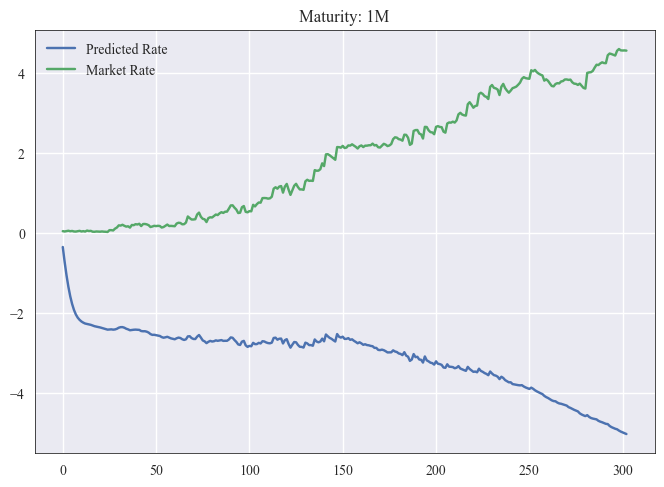

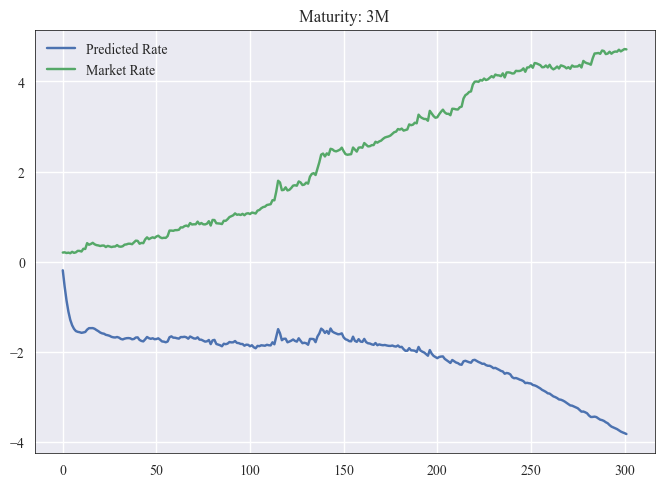

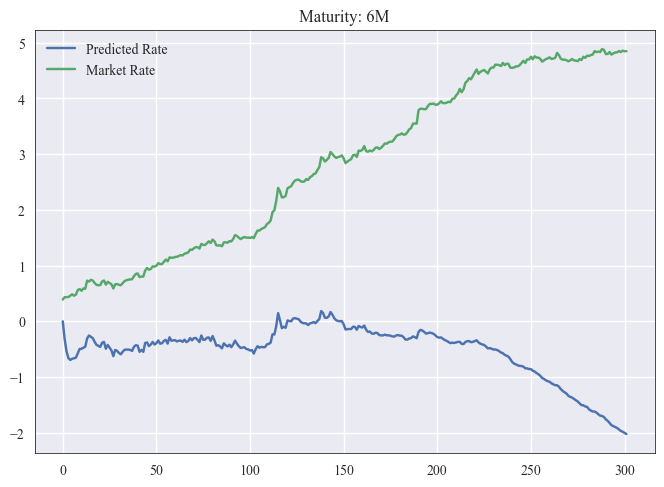

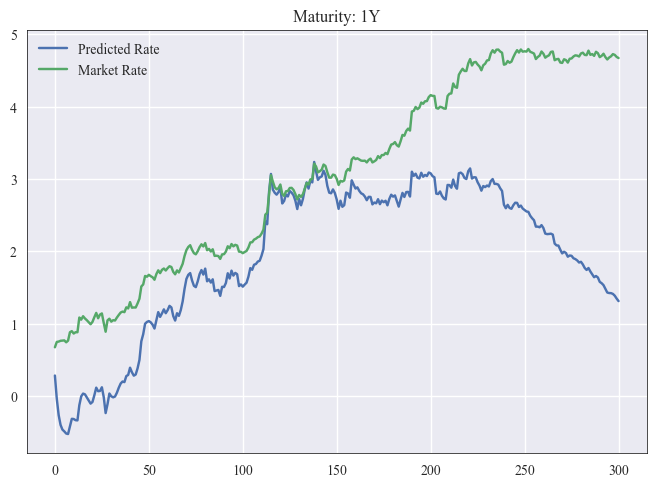

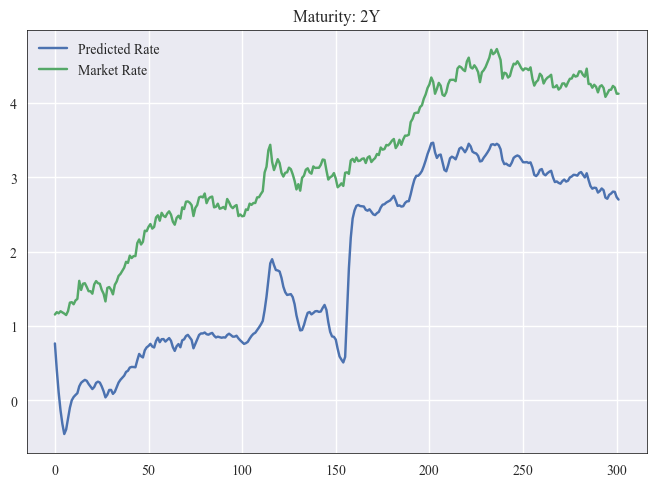

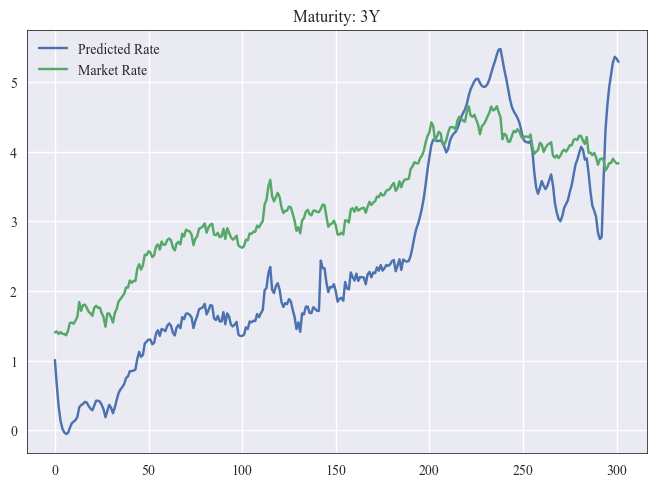

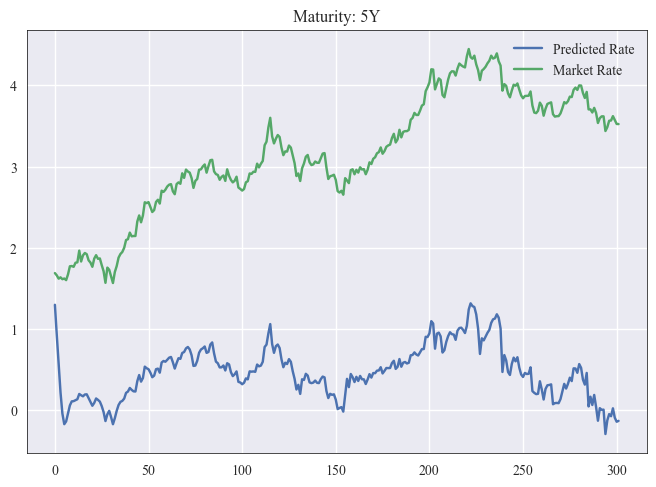

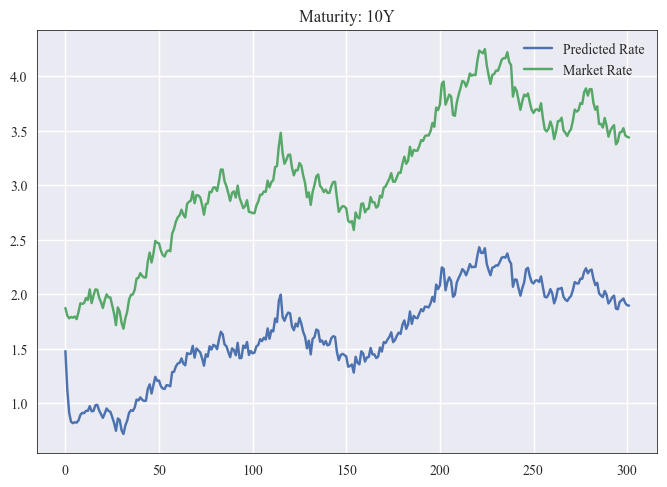

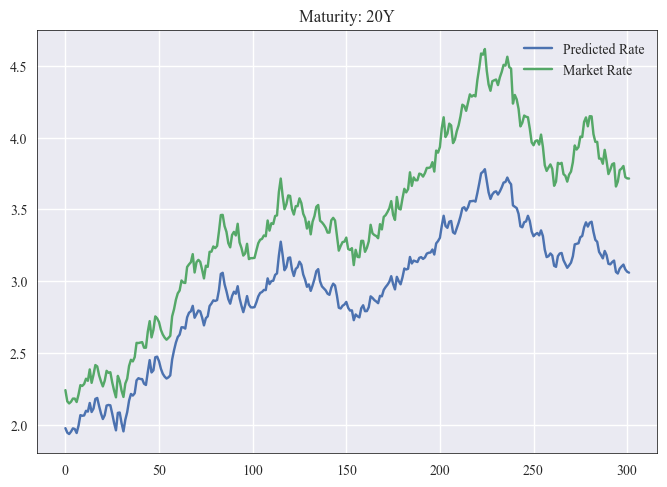

In [18]:
from hyperparameters import coupons, maturities_label

for maturity in maturities_label:

    df = pd.read_csv(f'market_data/{maturity}_cleaned.csv')

    b = 5
    a = (b * df.Price[0]) / 100
    sigma = 0.3

    initial_parameters = [coupons[maturity], a, b, sigma]
    initial_parameters = np.array(initial_parameters, dtype = np.float64)

    calibrate_to_market_data(
        model = model, market_data = df['Bond Price'], initial_parameters = initial_parameters, yields = df['Price'],
        time_to_expiry = df['Time to Expiry'], verbose_length = 10, epochs = 20, maturity = maturity
        )

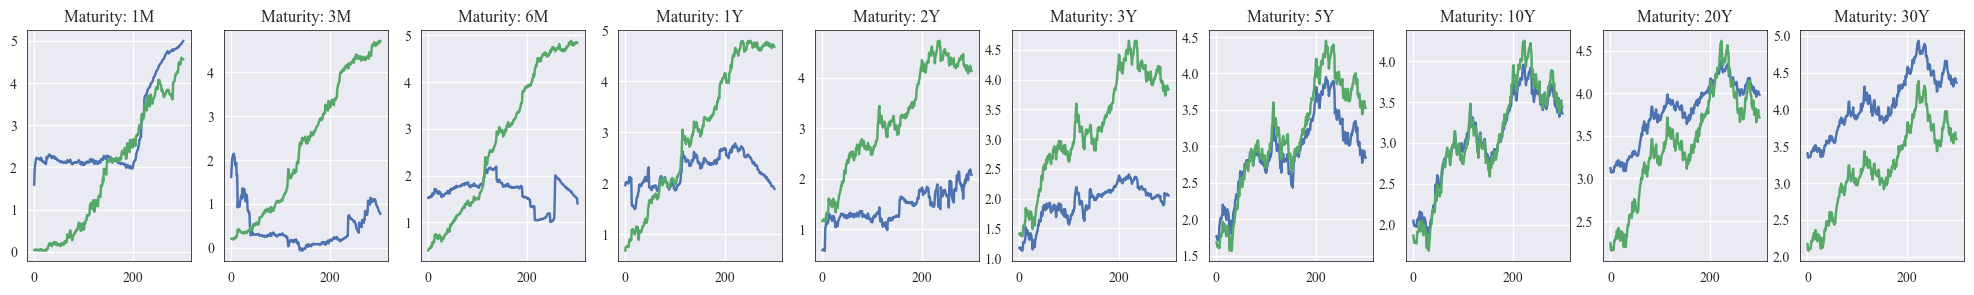

In [56]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize = (25, 3))

for i, maturity in enumerate(maturities_label):

    df = pd.read_csv(f'market_data/{maturity}_cleaned.csv')
    calib = pd.read_table(f"data/pointwise/pointwise_params_market_calibrated_dense_vasicek_{maturity}.dat", sep = " ", header = None)

    (100 * calib.loc[:, 2] / calib.loc[:, 3]).plot(ax = ax[i]);
    # (100 * calib.loc[:, 5]).plot(ax = ax[i]);
    ax[i].plot(df.Price.tolist());
    ax[i].set_title(f'Maturity: {maturity}')
    # ax[i].set_xlim((50, 300))
    # ax[i].set_ylim((0, 100))

## 4. Sensitivity Analysis

In [45]:
calib

,0,1,2,3,4,5
0,1.109589,0.04,-0.009713,0.566045,-0.078645,-0.072891
1,1.106849,0.04,-0.017406,0.581358,-0.133135,-0.120680
2,1.104110,0.04,-0.021072,0.588647,-0.158732,-0.143203
3,1.098630,0.04,-0.022219,0.590929,-0.166729,-0.150244
4,1.095890,0.04,-0.022536,0.591559,-0.168938,-0.152188
...,...,...,...,...,...,...
298,0.120548,0.04,0.012325,0.786377,-0.137216,-0.328569
299,0.117808,0.04,0.004670,0.809931,-0.145360,-0.339863
300,0.115068,0.04,0.007395,0.813741,-0.149431,-0.344072
301,0.112329,0.04,0.010114,0.817438,-0.153351,-0.348106


In [17]:
import numpy as np
from tqdm import tqdm
import random
from helper.utils import BondPricing

a_list = np.linspace(0, 1, 500)
b_list = np.linspace(1, 2, 500)
sigma_list = np.linspace(0.001, 0.1, 500)
r_list = np.linspace(0.001, 0.06, 500)
maturities = np.linspace(0.1, 30, 500)

a = 0.02638
b = 2  #(0.053703)
sigma = 0.35384  #(0.00099592)
r = 0.02

random.shuffle(maturities)
random.shuffle(r_list)

sigma_result = []
for sigma_hat, tau in tqdm(zip(sigma_list, maturities)):

    bp = BondPricing(parameters = [a, b, sigma_hat, r])
    price = bp(tau)
    sigma_result.append(price)

a_result = []
for a_hat, tau in tqdm(zip(a_list, maturities)):

    bp = BondPricing(parameters = [a_hat, b, sigma, r])
    price = bp(tau)
    a_result.append(price)

b_result = []
for b_hat, tau in tqdm(zip(b_list, maturities)):

    bp = BondPricing(parameters = [a, b_hat, sigma, r])
    price = bp(tau)
    b_result.append(price)

r_result = []
for r_hat, tau in tqdm(zip(r_list, maturities)):

    bp = BondPricing(parameters = [a, b, sigma, r_hat])
    price = bp(tau)
    r_result.append(price)

a_b_result = []
for a_hat, b_hat in tqdm(zip(a_list, b_list)):

    bp = BondPricing(parameters = [a_hat, b_hat, sigma, r])
    price = bp(1)
    a_b_result.append(price)

500it [00:00, 180167.70it/s]
500it [00:00, 173979.76it/s]
500it [00:00, 239237.05it/s]
500it [00:00, 220081.02it/s]
500it [00:00, 178298.93it/s]


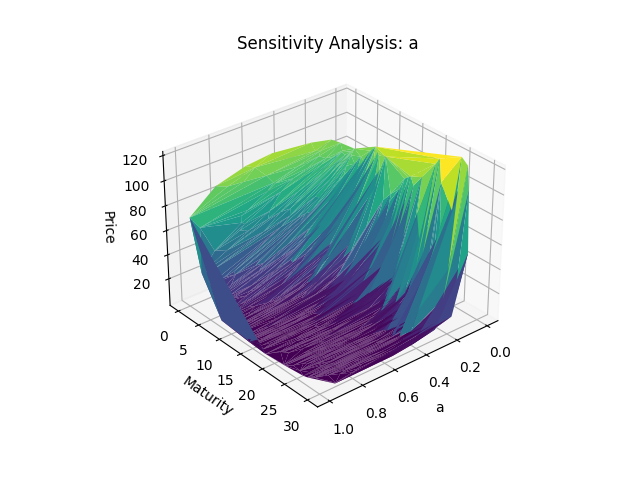

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
        a_list, maturities, a_result,
        cmap = 'viridis', edgecolor = 'none'
        );

ax.set_title('Sensitivity Analysis: a');

ax.set_xlabel('a')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 50, 0)


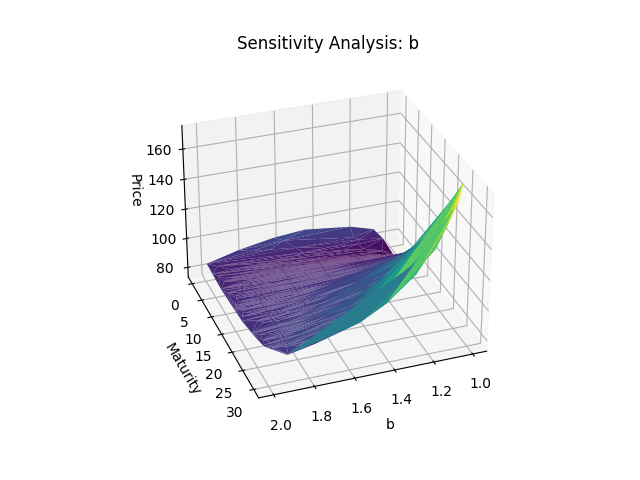

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
        b_list, maturities, b_result,
        cmap = 'viridis', edgecolor = 'none'
        );

ax.set_title('Sensitivity Analysis: b');

ax.set_xlabel('b')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 70, 0)


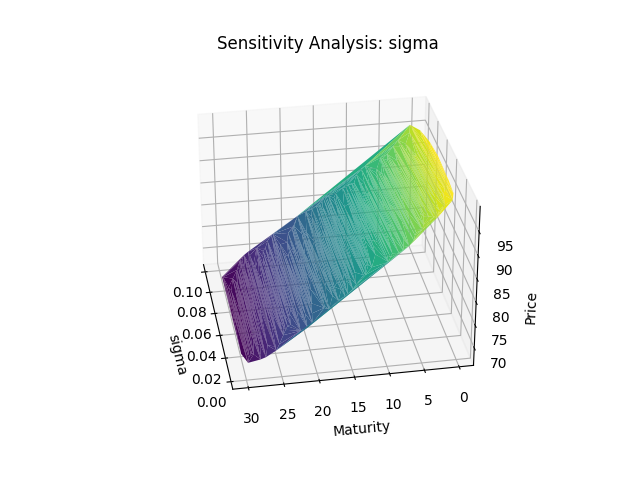

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
        sigma_list, maturities, sigma_result,
        cmap = 'viridis', edgecolor = 'none'
        );

ax.set_title('Sensitivity Analysis: sigma');

ax.set_xlabel('sigma')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 170, 0)

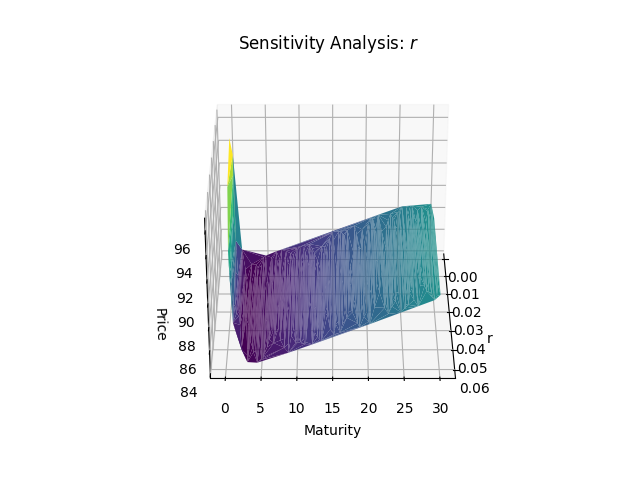

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

fig = plt.figure()
ax = Axes3D(fig)
ax = plt.axes(projection = '3d')
ax.plot_trisurf(
        r_list, maturities, r_result,
        cmap = 'viridis', edgecolor = 'none'
        );

ax.set_title('Sensitivity Analysis: $r$');

ax.set_xlabel('r')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price');

ax.view_init(30, 0, 0)

p is decreasing in r
increasing in sigma
decreasing in a

r ̄ = 0.042994 (0.0080023) κ = 0.162953 (0.053703)
σ = 0.015384 (0.00099592).


### 4.1 Market Data Analysis

In [ ]:
maturities = ['1M', '3M', '6M', '1Y', '2Y', '3Y', '5Y', '10Y', '20Y', '30Y']
dataframe = pd.DataFrame()

for maturity in maturities:

    df = pd.read_csv(f'market_data/{maturity}_cleaned.csv', index_col = 0)[['Bond Price', 'Price']]
    df.rename(columns = {"Bond Price": f'{maturity}', 'Price': f'{maturity} Yield'}, inplace = True)
    dataframe = pd.concat([dataframe, df], axis=1, join='outer')

dataframe.head()

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))
dataframe[maturities].rolling(20).mean().plot(cmap = 'viridis', ax=ax[0]);
dataframe[[f'{maturity} Yield' for maturity in maturities]].rolling(20).mean().plot(cmap = 'viridis', ax=ax[1]);
ax[0].set_title('Bond Price');
ax[1].set_title('Yields');

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))
(np.sqrt(12)*dataframe[maturities].rolling(20).std()).plot(cmap = 'viridis', ax=ax[0]);
(np.sqrt(12)*dataframe[[f'{maturity} Yield' for maturity in maturities]].rolling(20).std()).plot(cmap = 'viridis', ax=ax[1]);
ax[0].set_title('Bond Price');
ax[1].set_title('Yields');